In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data=get_market_static_data()

In [3]:
missing_mkts=['AL',
'CU',
'PB',
'RB',
'ZN']
              

In [4]:
missing_mkts=['B','ER','FB','GN','ME','RO','WS','WT']

In [5]:
data.T[missing_mkts].T[['exchange','Description']]

,exchange,Description
Ticker,,
B,DCE,Yellow Soybean No. 2
ER,CZCE,Early Indica Rice
FB,DCE,Medium Density Fiberboard
GN,CZCE,Mung bean
ME,CZCE,Methonal ME
RO,CZCE,Rapeseed Oil
WS,CZCE,Aberdeen
WT,CZCE,Hard Wheat


In [6]:
get_timeseries('RO')

Series([], dtype: float64)

In [7]:
load_market_price('RO')

""
index


# Load data 


In [8]:
FundAUM=1e6
mkts=get_market_list()
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m

AL
CU
PB
RB
ZN


# Charts for email to be sent once data is gathered and signals calculated

In [9]:
lots=calc_positions_two_lookbacks(10,40,mkts,df,FundAUM).dropna(how='all')

KeyError: "['AL' 'CU' 'PB' 'RB' 'ZN'] not in index"

In [ ]:
lots.ix[lots.index[-1]].plot(kind='bar',title='Current Positions')

In [ ]:
lots.diff().ix[lots.index[-1]].plot(kind='bar',title='Trades')

In [ ]:
curr_px=get_most_liquid_price(mkts)
PNL = calc_pnl_position_wc(lots,df,curr_px)

In [ ]:
(PNL['2017':].dropna(how='all').ffill()/FundAUM).cumsum().plot(colormap='jet',title='YTD PNL')

In [11]:
mkts=['AL',
'CU',
'PB',
'RB',
'ZN']

In [ ]:
dic={}
for m in mkts:
    try:
        dic[m]=get_most_liquid_price(m)
    except:
        print m

In [12]:
mkt=m

In [ ]:

OI = load_market_open_interest(mkt).dropna(how='all')
px= load_market_price(mkt).dropna(how='all')
s=pd.Series()
if px.size != 0:
    maxContract=OI.idxmax(axis=1)
    for row in maxContract.iteritems():
        try:
            s[row[0]]=px.ix[row[0]][row[1]]
        except:
            continue


In [ ]:
s.plot()

In [ ]:
adjusted_returns(price,volume).dropna().astype(dtype='float')

In [14]:
price=load_market_price(mkt)
volume=load_market_open_interest(mkt)


In [47]:
rtn=price.pct_change()
ww=volume.apply(lambda s: s.nlargest(2).index.tolist(), axis=1)
s=pd.Series()
mon='A00'
spread=0
for ind, val in ww.iteritems():
    mon=compare(mon,val[0])
    if ind in rtn.index:
        s.ix[ind]=rtn[val[0]].ix[ind]


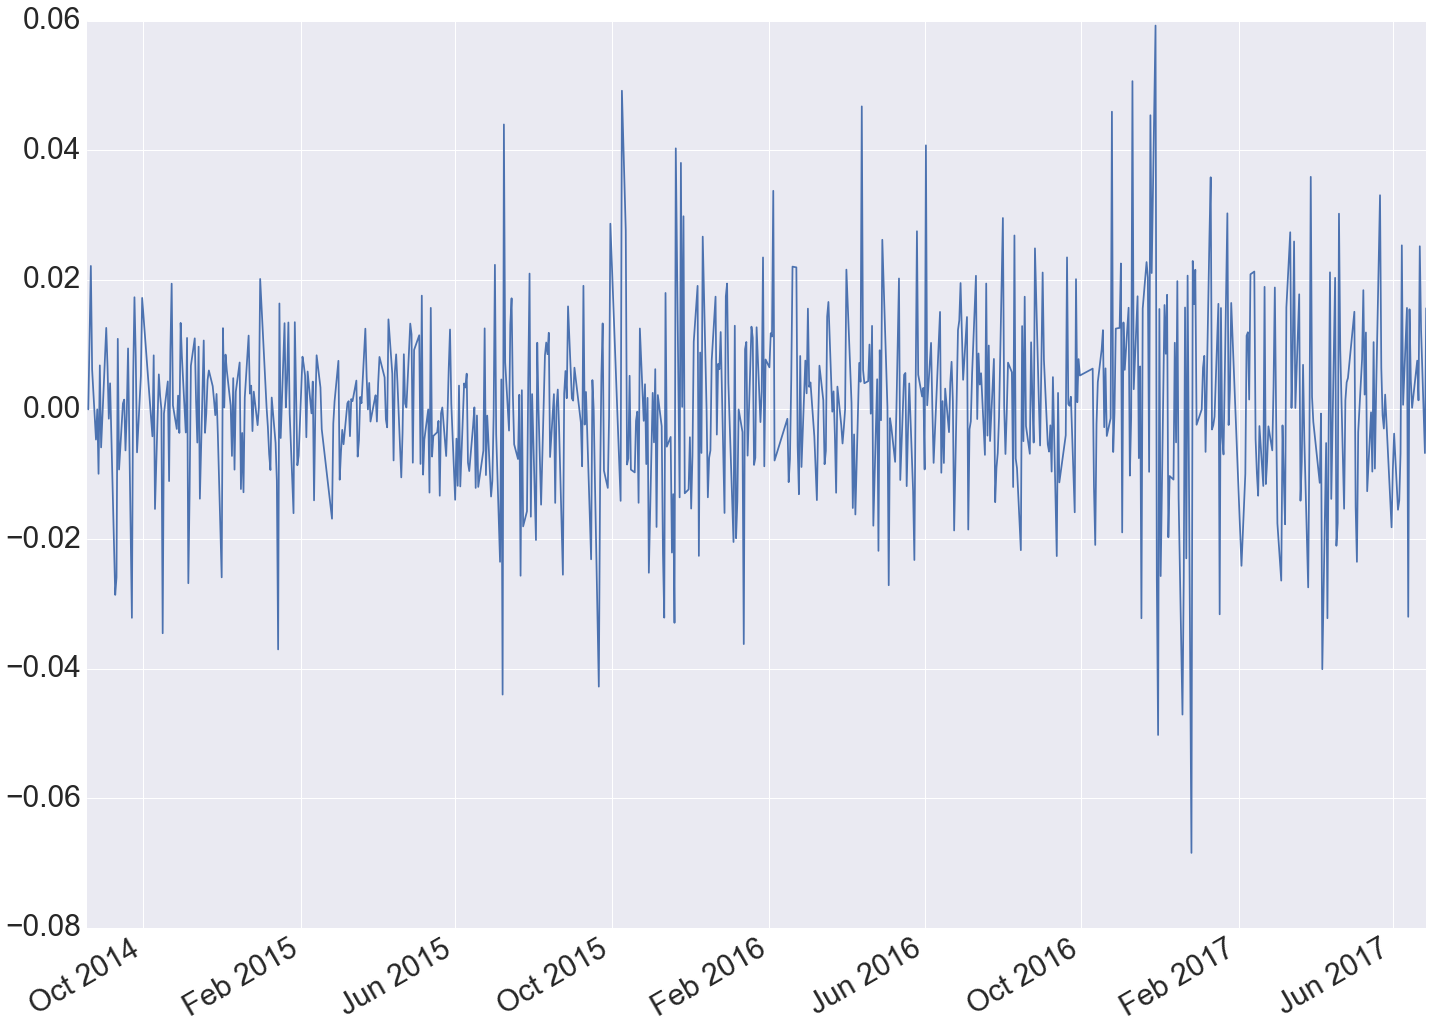

In [49]:
s.plot()